<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-science-bookcamp/case-study-2--online-ad-clicks/01_basic_probability_and_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic probability and statistical analysis

Statistics is a branch of mathematics dealing with the collection and interpretation
of numeric data. It is the precursor of all modern data science.

Poor record keeping could lead to potentially
disastrous results. That is why state bureaucrats were very concerned by any
random fluctuations in their records.

Probability theory eventually tamed these
fluctuations, making the randomness interpretable. Ever since then, statistics and
probability theory have been closely intertwined.

Probability theory studies random processes over a potentially infinite number
of measurements. It is not bound by real-world limitations.

Statistics help us understand exactly how much data is sufficient
to draw insights and make impactful decisions. The purpose of statistics is to find
meaning in data even when that data is limited in size.

In this notebook, we cultivate our understanding of statistics by
applying probability theory to real-world problems.

##Setup

In [1]:
from collections import defaultdict
import itertools

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

##Exploring the relationships between data and probability

The `stats` module is very useful for assessing the randomness of data.

In [2]:
# Analyzing extreme head counts using SciPy
num_heads = 16
num_flips = 20
prob_head = 0.5

prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


If we want the probability of seeing
exactly 16 heads, then we must utilize the `stats.binom.pmf` method. That method
represents the probability mass function of the binomial distribution.

A probability mass
function maps inputted integer values to their probability of occurrence.



In [3]:
#Computing an exact probability
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head)
print(f"The probability of seeing {num_heads} of {num_flips} haeds is {prob_16_heads}")

The probability of seeing 16 of 20 haeds is 0.004620552062988271


Multiple
head-count probabilities can be processed by passing in a list of head-count values.

In [4]:
# Computing an array of probabilities
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head)

assert probabilities.tolist() == [prob_16_heads] * 2

List-passing allows us to compute probabilities across intervals.

In [5]:
# Computing an interval probability
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head)
total_prob = probabilities.sum()

print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


Thus, we can generate the distribution
plot without having to iterate through possible coin-flip combinations.

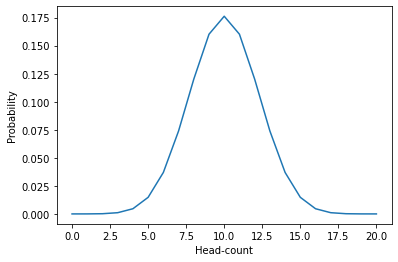

In [6]:
# Plotting a 20-coin-flip binomial distribution
plt.plot(interval_all_counts, probabilities)
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

The `stats.binom.pmf` method lets us display any distribution associated with an arbitrary coin-flip count. 

Let’s use our newfound freedom to simultaneously plot the distributions
for 20, 80, 140, and 200 coin flips,

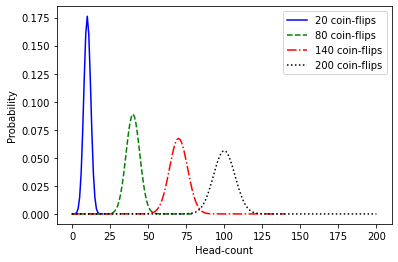

In [7]:
# Plotting five different binomial distributions
flip_counts = [20, 80, 140, 200]
linestyles = ["-", "--", "-.", ":"]
colors = ["b", "g", "r", "k"]

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
  x_values = range(num_flips + 1)
  y_values = stats.binom.pmf(x_values, num_flips, 0.5)
  plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f"{num_flips} coin-flips")
plt.legend()
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

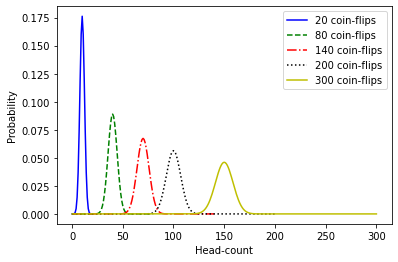

In [8]:
# Plotting five different binomial distributions
flip_counts = [20, 80, 140, 200, 300]
linestyles = ["-", "--", "-.", ":", "solid"]
colors = ["b", "g", "r", "k", "y"]

for num_flips, linestyle, color in zip(flip_counts, linestyles, colors):
  x_values = range(num_flips + 1)
  y_values = stats.binom.pmf(x_values, num_flips, 0.5)
  plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f"{num_flips} coin-flips")
plt.legend()
plt.xlabel("Head-count")
plt.ylabel("Probability")
plt.show()

Within the plot, the central peak of each binomial appears to shift rightward as the coin-flip count goes up. 

Also, the 20-coin-flip distribution is noticeably thinner than
the 200-coin-flip distribution. 

In other words, the plotted distributions grow more dispersed
around their central positions as these central positions move to the right.

However, simply noting that one plot appears thicker than
another is insufficient. Likewise, stating that one plot is more rightward than another
is also insufficient.

We need to quantify our distribution differences. We must assign
specific numbers to centrality and dispersion to discern how these numbers change
from plot to plot. 

Doing so requires that we familiarize ourselves with the concepts of
variance and mean.

##Mean as a measure of centrality

Suppose we wish to study our local temperature over the first week of summer. When
summer comes around, we glance at the thermometer outside our window. At noon,
the temperature is exactly 80 degrees. We repeat our noon measurements over the next six days. 

Our measurements are 80, 77, 73, 61, 74, 79, and 81 degrees.

In [9]:
# Storing recorded temperatures
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

**We’ll now attempt to summarize our measurements using a single central value.**

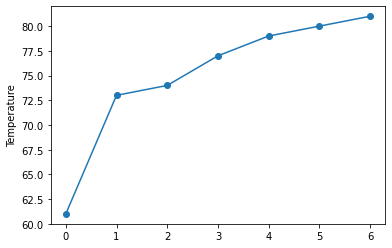

In [11]:
# Plotting the recorded temperatures
measurements.sort()
number_of_days = measurements.size

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel("Temperature")
plt.show()

Based on the plot, a central temperature exists somewhere between 60 degrees and 80 degrees. 

Therefore, **we can naively estimate the center as approximately 70 degrees.**

Let’s quantify our estimate as the midpoint between the lowest value and the highest value in the plot.

We compute that midpoint by taking half the difference between the
minimum and maximum temperatures and adding it to the minimum temperature.

In [12]:
# Finding the midpoint temperature
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2

assert midpoint == (measurements.max() + measurements.min()) / 2

print(f"The midpoint temperature is {midpoint} degrees")

The midpoint temperature is 71.0 degrees


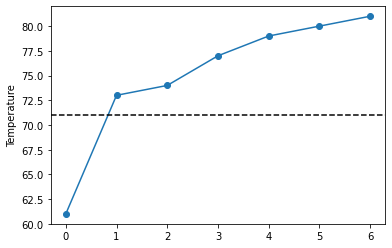

In [13]:
# Plotting the midpoint temperature
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color="k", linestyle="--")
plt.ylabel("Temperature")
plt.show()

Our plotted midpoint seems a little low: six of our seven measurements are higher than the midpoint.

Intuitively, **our central value should split the measurements more
evenly**—the number of temperatures above and below the center should be approximately
equal. 

We can achieve this equality by choosing the middle element in our
sorted seven-element array. 

**The middle element, which statisticians call the median, will split our measurements into two equal parts.**



The median temperature is 77 degrees


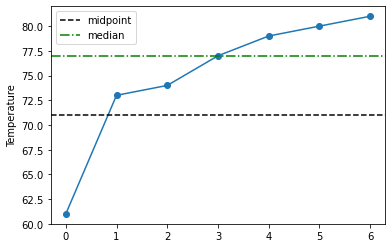

In [15]:
# Plotting the median temperature
median = measurements[3]
print(f"The median temperature is {median} degrees")

plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color="k", linestyle="--", label="midpoint")
plt.axhline(median, color="g", linestyle="-.", label="median")
plt.legend()
plt.ylabel("Temperature")
plt.show()

Our median of 77 degrees splits the temperatures in half. However, **the split is not well balanced since the median is closer to the upper three temperatures in the plot.**

**Perhaps we can balance the split by penalizing the median for being too far from the minimum.**

We’ll implement this penalty using the squared distance, which is simply
the square of the difference between two values.

In [16]:
# Penalizing centers using the squared distance from the minimum
def squared_distance(value1, value2):
  return (value1 - value2) ** 2

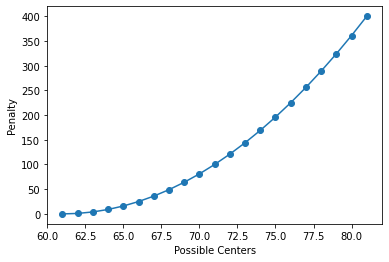

In [17]:
# Uses the range of values between the minimum and maximum measured temperatures as our set of possible centers
possible_centers = range(measurements.min(), measurements.max() + 1)
penalties = [squared_distance(center, 61) for center in possible_centers]

plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel("Possible Centers")
plt.ylabel("Penalty")
plt.show()

As the centers shift toward 61, the penalty drops, but their distance
to the remaining six measurements increases. 

Thus, **we ought to penalize each potential center based on its squared distance to all seven measurements.**

We’ll do so by defining a sum of squared distances function, which will add up the squared distances between some value and the measurement array.

In [18]:
# Penalizing centers using the total sum of squared distances
def sum_of_squared_distances(value, measurements):
  return sum(squared_distance(value, m) for m in measurements)

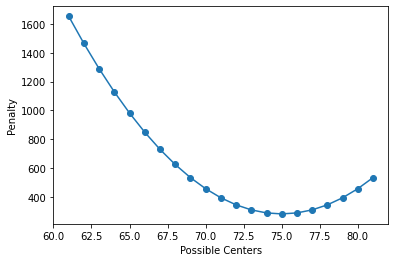

In [19]:
penalties = [sum_of_squared_distances(center, measurements) for center in possible_centers]

plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel("Possible Centers")
plt.ylabel("Penalty")
plt.show()

Based on our plot, the temperature of 75 degrees incurs the lowest penalty. 

We’ll informally refer to this temperature value as our “least-penalized center.”

In [20]:
least_penalized = 75

assert least_penalized == possible_centers[np.argmin(penalties)]

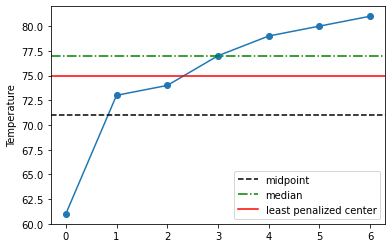

In [21]:
# Plotting the least-penalized temperature
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.axhline(midpoint, color="k", linestyle="--", label="midpoint")
plt.axhline(median, color="g", linestyle="-.", label="median")
plt.axhline(least_penalized, color="r", linestyle="-", label="least penalized center")
plt.legend()
plt.ylabel("Temperature")
plt.show()

**The least-penalized center splits the measured temperatures fairly evenly**: four measurements
appear above it, and three measurements appear below it. 

Thus, **this center maintains a balanced data split while providing a closer distance to the coldest recorded temperature relative to the median.**

**The least-penalized center is a good measure of centrality. It minimizes all the penalties incurred for being too far from any given point, which leads to balanced distances between the center and every data point.**

Unfortunately, our computation of
that center was very inefficient. Scanning all possible penalties is not a scalable solution.

Is there a more efficient way to compute the center?

Yes! Mathematicians have shown that **the sum-of-squared-distances error is always minimized by the average value of a dataset**. 

Thus, we can compute the least-penalized center directly. 

We simply need
to sum all the elements in measurements and then divide that sum by the array size.

In [22]:
# Computing the least-penalized center using an average value
assert measurements.sum() / measurements.size == least_penalized

**A summed array of values divided by array size is formally called the arithmetic mean.**

Informally, the value is referred to as the mean or the average of the array.

In [ ]:
#Computing the mean using NumPy
